<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
- Rodrigo Martínez Gallardo Bertoldi
- Pablo Alejandro Rivera Sánchez

**Fecha:** 26 de abril del 2021.

**Expediente** : 
- 
- 722268
- 721005
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase 22.

[Liga al repositorio](https://github.com/rodrigomart1nez/ProyectoConjunto_RMartinez_PRivera)

### Proyecto Conjunto.
> Instrucciones: Cada estudiante debe proponer una solución óptima a los problemas planteados a continuación.

# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

### _Solución Rodrigo._

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-06-18,18.75,call,AAPL210618C00018750,...,2021-04-28 18:27:29,2021-04-26 18:30:03,"{'contractSymbol': 'AAPL210618C00018750', 'str..."
2021-06-18,18.75,put,AAPL210618P00018750,...,2021-04-28 18:27:29,2021-04-22 14:35:20,"{'contractSymbol': 'AAPL210618P00018750', 'str..."
2021-06-18,20.00,call,AAPL210618C00020000,...,2021-04-28 18:27:29,2021-04-14 15:36:52,"{'contractSymbol': 'AAPL210618C00020000', 'str..."
2021-06-18,20.00,put,AAPL210618P00020000,...,2021-04-28 18:27:29,2021-03-22 19:57:37,"{'contractSymbol': 'AAPL210618P00020000', 'str..."
2021-06-18,21.25,call,AAPL210618C00021250,...,2021-04-28 18:27:29,2021-02-04 18:50:12,"{'contractSymbol': 'AAPL210618C00021250', 'str..."
...,...,...,...,...,...,...,...
2021-09-17,1000.00,call,AAPL210917C01000000,...,2021-04-28 18:27:30,2020-08-28 19:58:31,"{'contractSymbol': 'AAPL210917C01000000', 'str..."
2022-01-21,1000.00,call,AAPL220121C01000000,...,2021-04-28 18:27:30,2020-08-28 19:59:43,"{'contractSymbol': 'AAPL220121C01000000', 'str..."
2022-06-17,1000.00,call,AAPL220617C01000000,...,2021-04-28 18:27:30,2020-08-28 19:48:09,"{'contractSymbol': 'AAPL220617C01000000', 'str..."


### _Solución Pablo._

In [3]:
def get_adj_closes(tickers: 'Activo', start_date=None, end_date=None):

    '''
    Función que nos da los precios de cierre ajustado del activo especificado.
    '''
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    closes = closes['Adj Close']
    closes.sort_index(inplace=True)
    
    return closes

In [4]:
def calc_daily_ret(closes: 'Precios de cierre ajustado'):
    
    '''
    Función que nos regresa los rendimientos diaros de los precios de cierre ajustados.
    '''
    
    return np.log(closes/closes.shift(1)).iloc[1:]

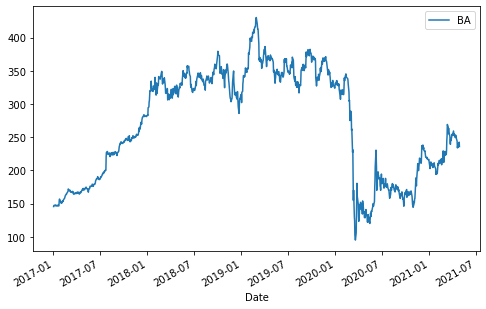

In [5]:
ticker = ['BA']
start_date = '2017-01-01'

closes_boeing = get_adj_closes(ticker, start_date)
closes_boeing.plot(figsize=(8,5));
plt.legend(ticker);

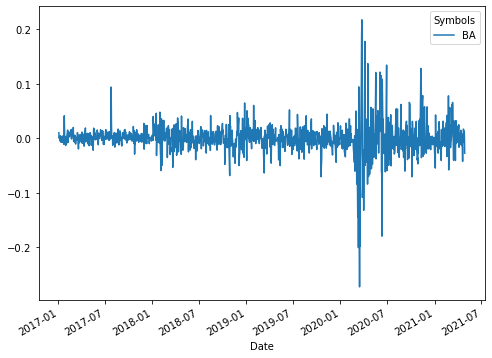

In [6]:
ret_boeing = calc_daily_ret(closes_boeing)
ret_boeing.plot(figsize=(8,6));

Con ayuda de las funciones y la paquetería/API de Yahoo, importamos los precios de cierre ajustado del activo que deseemos, en este caso será de Boeing (BA), la compañía de aviones. Posteriormente, calculamos los rendimientos de dichos precios y lo graficamos junto con la historia de los precios.

In [7]:
boeing = web.YahooOptions('BA')
opc_boeing = boeing.get_all_data().reset_index()
opc_boeing.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,242.5,call,BA210430C00242500,...,2021-04-28 18:27:29,2021-04-28 18:10:03,"{'contractSymbol': 'BA210430C00242500', 'strik..."
2021-04-30,325.0,put,BA210430P00325000,...,2021-04-28 18:27:29,2021-03-17 18:16:57,"{'contractSymbol': 'BA210430P00325000', 'strik..."
2021-04-30,135.0,put,BA210430P00135000,...,2021-04-28 18:27:29,2021-04-05 19:58:58,"{'contractSymbol': 'BA210430P00135000', 'strik..."
2021-04-30,215.0,put,BA210430P00215000,...,2021-04-28 18:27:29,2021-04-28 18:09:37,"{'contractSymbol': 'BA210430P00215000', 'strik..."
2021-04-30,215.0,call,BA210430C00215000,...,2021-04-28 18:27:29,2021-04-26 16:30:46,"{'contractSymbol': 'BA210430C00215000', 'strik..."
...,...,...,...,...,...,...,...
2023-01-20,270.0,call,BA230120C00270000,...,2021-04-28 18:27:29,2021-04-28 17:14:36,"{'contractSymbol': 'BA230120C00270000', 'strik..."
2023-01-20,95.0,put,BA230120P00095000,...,2021-04-28 18:27:29,2021-04-27 14:24:21,"{'contractSymbol': 'BA230120P00095000', 'strik..."
2023-01-20,95.0,call,BA230120C00095000,...,2021-04-28 18:27:29,2021-04-01 15:09:01,"{'contractSymbol': 'BA230120C00095000', 'strik..."


In [8]:
opc_boeing.Underlying_Price[0]

235.9701

Descargamos los datos de todas las opciones que estén disponibles en el mercado de nuestro activo. De todas estas vamos a seleccionar una con el siguiente strike price y fecha de expiración. La elección de este precio de ejercicio se debe a que vamos a estimar el precio de una opción tipo put, es decir, vamos a ganar si el precio del activo subyacente es menor al precio de ejercicio, ya que esperamos vender a un precio más caro del real. 

In [9]:
K = 245 # strike price
indice_opc = opc_boeing.loc[(opc_boeing.Type=='put') & (opc_boeing.Strike==K) & (opc_boeing.Expiry=='2023-01-20')] # Cambiar fecha
indice_opc     

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
795,245.0,2023-01-20,put,...,2021-04-28 18:27:29,2021-04-28 16:07:38,"{'contractSymbol': 'BA230120P00245000', 'strik..."


Obtenemos una opción con este precio de ejercicio y fecha de expiración, podemos analizar sus características. Nuestro objetivo será aproximarnos lo más posible al "lastPrice", que es el precio de la opción, como simularemos varios escenarios continuos en el tiempo, podremos ver la evolución de dicho precio a través del tiempo. 

In [10]:
i_opt = indice_opc.index
opcion_valuar = opc_boeing.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'BA230120P00245000',
 'strike': 245.0,
 'currency': 'USD',
 'lastPrice': 47.48,
 'change': 2.880001,
 'percentChange': 6.457402,
 'volume': 1,
 'openInterest': 71,
 'bid': 45.8,
 'ask': 48.85,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619626058,
 'impliedVolatility': 0.35315588256835934,
 'inTheMoney': True}

Obtenemos tanto la media como la desviación estándar de los rendimientos. Como estamos bajo los supuestos de Black & Scholes, uno de ellos es que asumimos que estamos en un mercado libre de riesgo, no vamos a utilizar la media de los rendimientos como la media real, si no que usaremos la tasa libre de riesgo como la media. 

In [11]:
mu = ret_boeing.mean()[0]
sigma = ret_boeing.std()[0]

# Tasa libre de riesgo anual al día de hoy es 0.07%
r = 0.0007/360 # tasa diaria

Posteriormente, pasamos a simular varios escenarios posibles del comportamiento del rendimiento de la acción desde el día de hoy hasta el día en el que la opción expira. Estos rendimientos, a su vez, nos ayudarán a simular varios escenarios posibles del comportamiento del precio de la acción. 


In [12]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

dates = pd.date_range(start = today, end = expiry, freq = 'B')

ndays = len(dates) # Número de días (t)
nscen = 100000

In [13]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates) # Rendimientos simulados

In [14]:
# Ya teniendo los rendimientos, simulamos ahora los precios
S0 = closes_boeing.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0, :] = S0 # Que todos empiezen del mismo valor
sim_closes

,0,1,2,...,99997,99998,99999
2021-04-28,235.970,235.970,235.970,...,235.970,235.970,235.970
2021-04-29,252.570,245.423,228.352,...,242.983,252.147,236.307
2021-04-30,249.702,245.468,235.502,...,247.502,254.248,225.147
2021-05-03,255.637,243.635,234.832,...,244.446,249.779,222.180
2021-05-04,261.545,247.242,235.974,...,255.995,240.008,229.252
...,...,...,...,...,...,...,...
2023-01-16,173.521,216.274,135.157,...,1329.722,244.818,299.380
2023-01-17,172.750,216.559,130.470,...,1308.359,242.266,310.686
2023-01-18,166.245,205.406,135.085,...,1325.371,231.569,298.114
2023-01-19,171.714,200.098,131.375,...,1309.258,229.753,295.475


Por último, aplicamos la fórmula vista en clase para obtener el precio de la opción para cada instancia en cada uno de los escenarios. 

$$\text{Valor actual de la opción} = V(S_0, T) = E^*(e^{-rT} f(S_T)) = e^{-rT} E^*(f(S_T))$$

En este caso, utilizaremos como $f(S_T)$ la función de pago de una opción put, la cual está dada por la siguiente fórmula: 

$$ P(S(t),t)=max\{K-S(T),0\} $$ 

Programamos esto para todos los escenarios posibles y obtenemos los siguientes resultados.

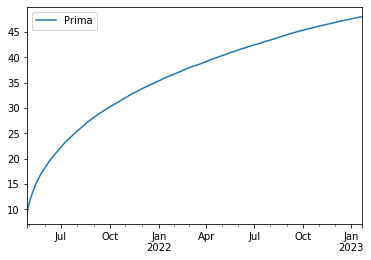

In [15]:
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(K - sim_closes,0).mean(axis=1)}, index=dates)
put.plot();

In [16]:
rput = put.iloc[-1].values
rput # Valor de la prima

array([48.01860285])

In [17]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
i # Intervalo de confianza al 99% de la prima

(46.248187995176856, 49.78901770511802)

Ahora vamos a calcular la prima con la distribución de los rendimientos:

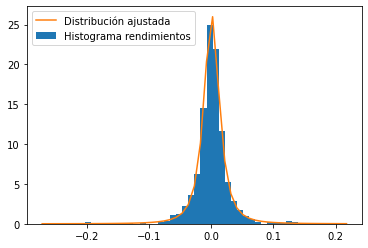

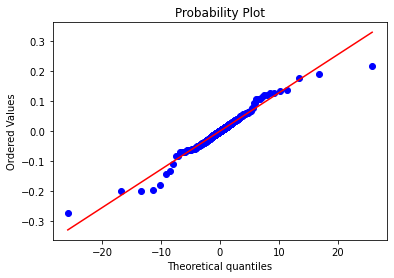

In [18]:
# rendimientos 
ren = calc_daily_ret(closes_boeing) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['BA'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren['BA'], sparams=params[:-2], dist=dist, plot=plt);

En este caso se usó la distribución T, la gráfica Q-Q se ajusta bien a los datos y fue la que vimos en clase. Podríamos encontrar otra distribución que se ajuste mejor a los datos y sobre ella repetir el mismo procedimiento y posiblemente obtener mejores resultados. 

In [19]:
prob = y/np.sum(y) # Para tener valores entre 0 y 1, se representan como probabilidades
values = x[1:]

In [20]:
# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_boeing+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_boeing.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

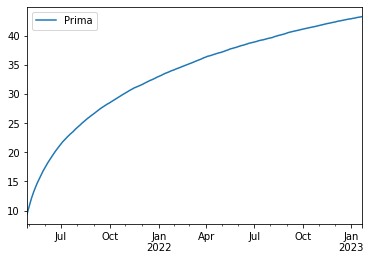

In [21]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike - sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

Nuevamente simulamos precios a través de los rendimientos y calculamos el precio de la prima a lo largo del tiempo. 

In [22]:
rput_hist = put_hist.iloc[-1]
rput_hist # Valor de la prima

Prima    43.264
Name: 2023-01-20 00:00:00, dtype: float64

In [23]:
sigma_hist = sim_closes_hist.iloc[-1].sem()
mean_hist = put_hist.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_hist, scale=sigma_hist)
i2 # Intervalo de confianza de la prima

(41.412917826210986, 45.11461942600049)

Pasamos a calcular el valor teórico de la opción usando las fórmulas de Black & Scholes.

$$
d_1 = \frac{\ln{\frac{S_0}{K}} + (r + \sigma^2 / 2) T}{\sigma \sqrt{T}}, \quad d_2 = \frac{\ln{\frac{S_0}{K}} + (r - \sigma^2 / 2) T}{\sigma \sqrt{T}} 
$$

Lo de abajo son los valores/variables que vamos a necesitar para calcular el valor teórico de la acción por medio de Black & Scholes. Calculamos lo necesario y obtenemos los siguientes resultados.

In [24]:
# Datos o información necesaria para aplicar las fórmulas
opc_boeing.Underlying_Price[0], K, r, sigma*np.sqrt(252), ndays

(235.9701, 245, 1.9444444444444444e-06, 0.49066246448135287, 453)

$$d_1 = \frac{\ln{\frac{242}{245}} + (1.94x10^{-6} + 0.0009/2)(455)}{0.0309\sqrt{455}}$$

$$d_2 = \frac{\ln{\frac{242}{245}} + (1.94x10^{-6} - 0.0009/2)(455)}{0.0309\sqrt{455}}$$

In [25]:
d1 = (np.log(opc_boeing.Underlying_Price[0] / K) + (r*360 + sigma**2/2)*ndays) / (sigma*np.sqrt(ndays))
d2 = (np.log(opc_boeing.Underlying_Price[0] / K) + (r*360 - sigma**2/2)*ndays) / (sigma*np.sqrt(ndays))
d1, d2

(0.7538641126916307, 0.09600686082796027)

In [26]:
Nd1 = st.norm.cdf(-d1)
Nd2 = st.norm.cdf(-d2)
Nd1, Nd2

(0.22546541081269256, 0.4617575617918116)

Calculamos los componentes de la fórmula de Black & Scholes (N(d1) y N(d2)) y los usamos para calcular el precio de la opción mediante la fórmula completa.

$$p = K e^{-rT} N(-d_2) - S_0 N(-d_1)$$

In [27]:
BS = (K * np.exp(-r * ndays) * Nd2) - (opc_boeing.Underlying_Price[0] * Nd1)
BS # Valor teórico de la opción

59.827901771445326

In [28]:
# Resumen
res = pd.DataFrame(data = {'Montecarlo': rput,
                          'Histograma': rput_hist,
                          'Teórico': BS,
                          'Real': opcion_valuar['JSON']['lastPrice']})
res

,Montecarlo,Histograma,Teórico,Real
Prima,48.019,43.264,59.828,47.48


Vemos que el precio de la opción encontrado por medio de los distintos métodos es muy similar al precio actual de la opción, sus respectivos intervalos de confianza al 99% también es adecuado, por lo que podemos concluir que estos métodos sí estiman bien dichos precios. El único que no se acercó para nada al valor real fue el valor teórico calculado con las fórmulas de Black & Scholes. A su vez, calcularlo mediante los métodos de simulación Montecarlo nos permite ver el comportamiento de la prima a lo largo del tiempo, no solamente su valor final (que sería el precio de la opción actual). Ver el comportamiento de la prima nos puede ayudar a, por ejemplo, si necesitamos una prima más barata, podemos encontrar una opción similar que tenga una fecha de cierre antes o después, dependiendo del precio y adquirirla.